In [1]:
from utility_bferror import *
from utility_bfcombiner import *

In [2]:
covar = np.load('../data/covar.npy')
covarTotal = np.sum(covar,axis=0)
beta0 = np.array([0.10883379, 0.10800187, 0.10689639,
                  0.11196685, 0.10982913, 0.10544397,
                  0.10505873, 0.10762646, 0.10785138,
                  0.11019370, 0.10963078, 0.10709402])

# 1. Uncertainty of Combined BR

[1.45831047 1.52661916 4.49439334]


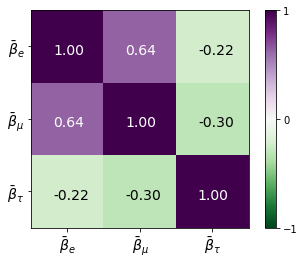

In [25]:
# statisitcal
# combiner = bfCombiner(covar[0], beta0)
# sigma, corr = combiner.bfvar()
# print(sigma/0.1080*100)

# total
combiner = bfCombiner(covarTotal, beta0)
sigma, corr = combiner.bfvar()
print(sigma/0.1080*100)

showParameterCov(corr)
plt.savefig('../plots/covarMatrix_beta.png',dpi=300)

In [11]:
combiner = bfCombiner(covarTotal, beta0, paramTypy='r')
sigma, corr = combiner.bfvar()

r,dr = combiner.paramLS[0], sigma[0]
print('{:3.2f} +/- {:3.2f} '.format(r,dr))

0.97 +/- 0.05 


# 2. Plot Var Matrix

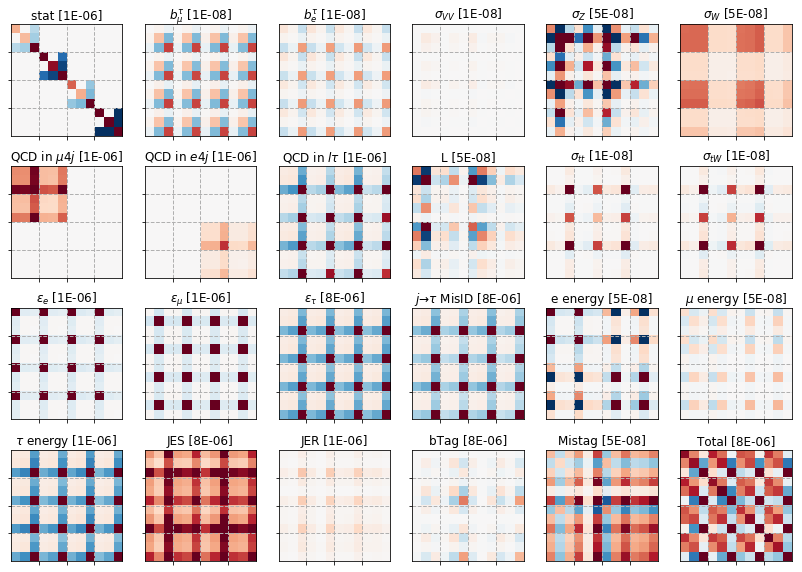

In [24]:
plt.figure(figsize=(14,10),facecolor='w')
showCovar(covar,sameCNorm=False)
plt.savefig('../plots/covarMatrix.png',dpi=300)

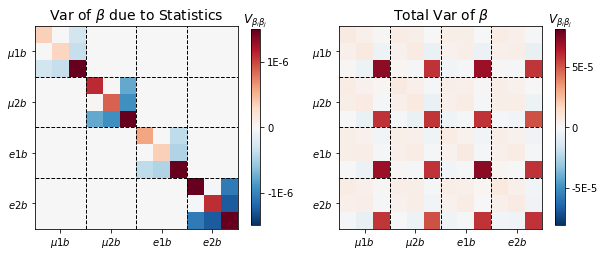

In [23]:
plt.figure(figsize=(10,4),facecolor='w')

plt.subplot(1,2,1)
mtx = covar[0] #* 10000
showSingleCovar(mtx, norm= 1.5e-6, titleName=r'Var of $\beta$ due to Statistics')
cbar = plt.colorbar( ticks=[-1e-6, 0, 1e-6],shrink=0.9)
cbar.ax.set_title(r'$V_{\beta_i\beta_j}$')
cbar.ax.set_yticklabels(['-1E-6', '0', '1E-6'])

plt.subplot(1,2,2)

mtx = np.sum(covar,axis=0) #* 10000
showSingleCovar(mtx, norm= 81e-6, titleName=r'Total Var of $\beta$')
cbar = plt.colorbar( ticks=[-5e-5, 0, 5e-5],shrink=0.9)
cbar.ax.set_title(r'$V_{\beta_i\beta_j}$')
cbar.ax.set_yticklabels(['-5E-5', '0', '5E-5'])


plt.savefig('../plots/covarMatrix2.png',dpi=300)